In [1]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

In [2]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32

In [3]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
# Завантаження тренувальних та тестових даних зі вказанням обмеження на кількість слів

In [4]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

In [5]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))


In [6]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, None, 32)          8320      
                                                                 
 lstm_1 (LSTM)               (None, None, 32)          8320      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 344993 (1.32 MB)
Trainable params: 344993 (1.32 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)
# Запускаємо навчання моделі на тренувальних даних для 5 епох з розміром пакету 128 та розбиттям на тренувальну та валідаційну підмножини

Epoch 1/5
137/137 [==============================] - 133s 932ms/step - loss: 0.6798 - acc: 0.5422 - val_loss: 0.5677 - val_acc: 0.7072
Epoch 2/5
137/137 [==============================] - 127s 925ms/step - loss: 0.4413 - acc: 0.8001 - val_loss: 0.4616 - val_acc: 0.7861
Epoch 3/5
137/137 [==============================] - 124s 908ms/step - loss: 0.3062 - acc: 0.8780 - val_loss: 0.8686 - val_acc: 0.6507
Epoch 4/5
137/137 [==============================] - 126s 923ms/step - loss: 0.2485 - acc: 0.9031 - val_loss: 0.3104 - val_acc: 0.8699
Epoch 5/5
137/137 [==============================] - 125s 913ms/step - loss: 0.2113 - acc: 0.9214 - val_loss: 0.3742 - val_acc: 0.8667


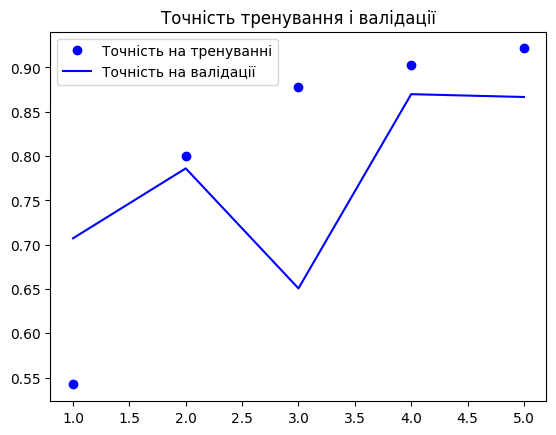

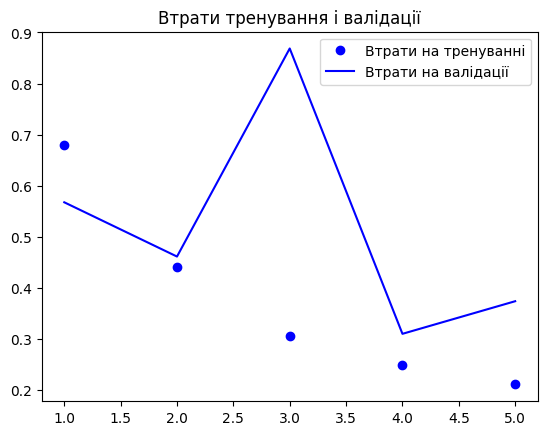

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

In [10]:
predictions = model.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 100s 126ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 102s 130ms/step - loss: 0.4086 - acc: 0.8515
Test Loss: 0.40863168239593506
Test Accuracy: 0.8514800071716309


In [11]:
from sklearn.metrics import classification_report

# Отримання передбачень
predicted_probs = model.predict(input_test)
predicted_labels = [1 if prob > 0.5 else 0 for prob in predicted_probs]

# Отримання звіту про класифікацію
report = classification_report(y_test, predicted_labels)
print(report)


782/782 [==============================] - 99s 127ms/step
              precision    recall  f1-score   support

           0       0.80      0.93      0.86     12500
           1       0.92      0.77      0.84     12500

    accuracy                           0.85     25000
   macro avg       0.86      0.85      0.85     25000
weighted avg       0.86      0.85      0.85     25000

